# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>
## <p style="text-align: center;">Team: DavisTownsend & Dallas Griffin



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

%pylab inline

import numpy as np
import seaborn as sns

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

C:\Users\Dallas\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dallas\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### Part 1 - Fit a MLP

In [2]:
MLP = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=.0001, 
                    solver='sgd', verbose=10, tol=.0001, random_state=42, learning_rate_init=.1)

#Fit model & predict y
MLP.fit(X_train, y_train)
pred_y_train = MLP.predict(X_train)
pred_y_test = MLP.predict(X_test)

Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893


C:\Users\Dallas\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


C:\Users\Dallas\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 'high') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Precision:0.99563632295
Recall: 0.995620101429
Accuracy: 0.995620101429


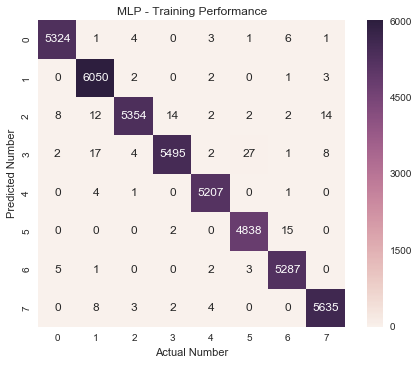

In [3]:
#Model accuracy - training data
print
print 'Precision:' + str(metrics.precision_score(y_train, pred_y_train, average = 'weighted', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_train, pred_y_train, average = 'weighted', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_train, pred_y_train))

# Fancy boy confusion matrix - training data
mat = metrics.confusion_matrix(y_train, pred_y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Actual Number')
plt.ylabel('Predicted Number')
plt.title('MLP - Training Performance')

Precision:0.980387484364
Recall: 0.980290456432
Accuracy: 0.980290456432


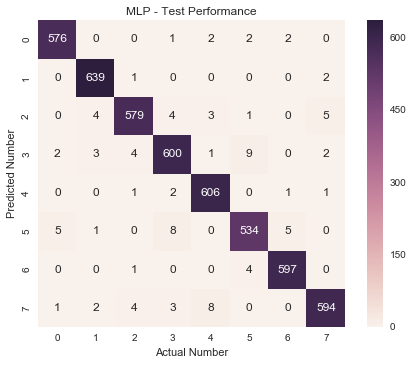

In [4]:
#Model accuracy - training data
print 'Precision:' + str(metrics.precision_score(y_test, pred_y_test, average = 'weighted', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, pred_y_test, average = 'weighted', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, pred_y_test))

# Fancy boy confusion matrix - training data
mat = metrics.confusion_matrix(y_test, pred_y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Actual Number')
plt.ylabel('Predicted Number')
plt.title('MLP - Test Performance')

### Part 2 - Optimize MLP Parameters

In [5]:
param_grid = { 'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu'] }

In [6]:
#cross validate
param_grid = { 'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu'] }
clf = GridSearchCV(MLP, param_grid)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.63780467
Iteration 2, loss = 0.26993412
Iteration 3, loss = 0.24531053
Iteration 4, loss = 0.23249797
Iteration 5, loss = 0.22329679
Iteration 6, loss = 0.21626242
Iteration 7, loss = 0.21060256
Iteration 8, loss = 0.20636226
Iteration 9, loss = 0.20275525
Iteration 10, loss = 0.19956171
Iteration 1, loss = 0.63829233
Iteration 2, loss = 0.27025643
Iteration 3, loss = 0.24654183
Iteration 4, loss = 0.23410992
Iteration 5, loss = 0.22552123
Iteration 6, loss = 0.21804481
Iteration 7, loss = 0.21292405
Iteration 8, loss = 0.20858724
Iteration 9, loss = 0.20470124
Iteration 10, loss = 0.20241500
Iteration 1, loss = 0.63081829
Iteration 2, loss = 0.26626237
Iteration 3, loss = 0.24312374
Iteration 4, loss = 0.22986850
Iteration 5, loss = 0.22091677
Iteration 6, loss = 0.21371822
Iteration 7, loss = 0.20887361
Iteration 8, loss = 0.20509427
Iteration 9, loss = 0.20130855
Iteration 10, loss = 0.19839854
Iteration 1, loss = 0.60657526
Iteration 2, loss = 0.22005063
Itera

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'activation': ['logistic', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
print "{}:{}".format("Best parameters", clf.best_params_)
print "{}{}".format("Best score:",clf.best_score_)

Best parameters:{'alpha': 0.01, 'activation': 'relu'}
Best score:0.976947902259


#### Conclusion:
The "optimal" paramaters selected perform worse then the original parameters provided (???)

### Part 3 - Display Misclassifications

Sample Missclassifications:


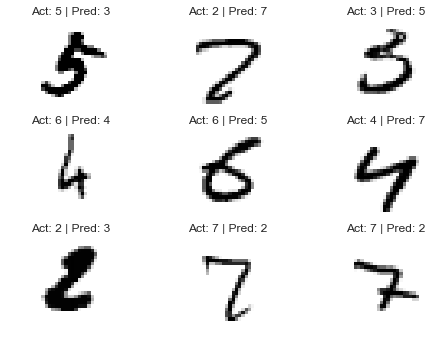

In [10]:
#Plot missclasified images
#NOTE - Using parameters from Part 1 for now. Will need to change once we figure out whats going on with Part 2.

misclass_idx = np.where(y_test != pred_y_test)

misclass_act = y_test[misclass_idx]
misclass_pred = pred_y_test[misclass_idx]
misclass_img = X_test[misclass_idx]*255
misclass_img = misclass_img.astype(int)

misclass_list = zip(misclass_act,misclass_pred,misclass_img)

print "Sample Missclassifications:"
for index, missclass in enumerate(misclass_list[:9]):
    plt.subplot(3, 3, index+1)
    plt.axis('off')
    plt.imshow(missclass[2].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Act: %i | Pred: %i' % (missclass[0], missclass[1]))
    
plt.show()

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
hitters = pd.read_csv("hitters.csv")
hitters_target = hitters['Salary']
hitters_data = hitters
del hitters_data['Salary']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(hitters_data, hitters_target, test_size=0.333, random_state=42)

## Part 1

In [15]:
DTR = DecisionTreeRegressor(max_depth=5)
model = DTR.fit(x_train, y_train)
#training data
pred_y_train = model.predict(x_train)
train_MSE = mean_squared_error(y_train, pred_y_train)
train_RMSE = np.sqrt(train_MSE)
print "training data MSE:", train_MSE
print "training data RMSE:", train_RMSE
#test data
pred_y_test = model.predict(x_test)
test_MSE = mean_squared_error(y_test, pred_y_test)
test_RMSE = np.sqrt(test_MSE)
print "test data MSE:", test_MSE
print "test data RMSE:", test_RMSE


training data MSE: 18749.4789728
training data RMSE: 136.928736841
test data MSE: 225103.898055
test data RMSE: 474.451154551


## Part 2

We see that the errors on the both the training and test data have gone down

In [16]:
DTR = DecisionTreeRegressor(max_depth=2)
model = DTR.fit(x_train, y_train)
#training data
pred_y_train = model.predict(x_train)
train_MSE = mean_squared_error(y_train, pred_y_train)
train_RMSE = np.sqrt(train_MSE)
print "training data MSE:", train_MSE
print "training data RMSE:", train_RMSE
#test data
pred_y_test = model.predict(x_test)
test_MSE = mean_squared_error(y_test, pred_y_test)
test_RMSE = np.sqrt(test_MSE)
print "test data MSE:", test_MSE
print "test data RMSE:", test_RMSE

training data MSE: 69909.5877084
training data RMSE: 264.404212728
test data MSE: 166165.705731
test data RMSE: 407.634279387


## Part 3

The second tree with the max depth of 5 is better but it is possible that it's overfitting

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)
svr = SVR()

## Part 1
RBF Kernel

In [19]:
model = svr.fit(x_train, y_train)
#training data
pred_y_train = model.predict(x_train)
train_MSE = mean_squared_error(y_train, pred_y_train)
train_RMSE = np.sqrt(train_MSE)
print "training data RMSE:", train_RMSE
#test data
pred_y_test = model.predict(x_test)
test_MSE = mean_squared_error(y_test, pred_y_test)
test_RMSE = np.sqrt(test_MSE)
print "test data RMSE:", test_RMSE

training data RMSE: 0.174703118961
test data RMSE: 0.549667753896


## Part 2
Linear Kernel

In [20]:
svr = SVR(kernel='linear')
model = svr.fit(x_train, y_train)
#training data
pred_y_train = model.predict(x_train)
train_MSE = mean_squared_error(y_train, pred_y_train)
train_RMSE = np.sqrt(train_MSE)
print "training data RMSE:", train_RMSE
#test data
pred_y_test = model.predict(x_test)
test_MSE = mean_squared_error(y_test, pred_y_test)
test_RMSE = np.sqrt(test_MSE)
print "test data RMSE:", test_RMSE

training data RMSE: 0.477967720085
test data RMSE: 0.231968041522


Linear Regression

In [21]:
LR = LinearRegression()
model = LR.fit(x_train, y_train)
#training data
pred_y_train = model.predict(x_train)
train_MSE = mean_squared_error(y_train, pred_y_train)
train_RMSE = np.sqrt(train_MSE)
print "training data RMSE:", train_RMSE
#test data
pred_y_test = model.predict(x_test)
test_MSE = mean_squared_error(y_test, pred_y_test)
test_RMSE = np.sqrt(test_MSE)
print "test data RMSE:", test_RMSE

training data RMSE: 0.458060629343
test data RMSE: 0.260057137391


## Part 3

In [22]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
LinReg = LinearRegression()
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_LinReg = LinReg.fit(x_train, y_train).predict(x_test)
rbf_test_mse = mean_squared_error(y_test, y_rbf)
lin_test_mse = mean_squared_error(y_test, y_lin)
LinReg_test_mse = mean_squared_error(y_test, y_LinReg)
rbf_test_rmse = np.sqrt(rbf_test_mse)
lin_test_rmse = np.sqrt(lin_test_mse)
LinReg_test_rmse = np.sqrt(LinReg_test_mse)
print 'RBF test RMSE:{}'.format(rbf_test_rmse)
print 'Linear test RMSE:{}'.format(lin_test_rmse)
print 'Linear Regression test RMSE:{}'.format(LinReg_test_rmse)

RBF test RMSE:0.549667753896
Linear test RMSE:0.231968041522
Linear Regression test RMSE:0.260057137391


## Part 4

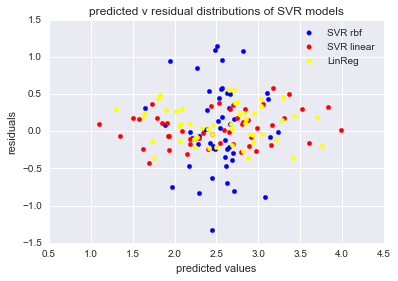

In [23]:
resid_rbf = y_rbf - y_test
resid_lin = y_lin - y_test
resid_linreg = y_LinReg - y_test

plt.figure()
plt.scatter(y_rbf, resid_rbf, color='blue', label='SVR rbf')
plt.scatter(y_lin, resid_lin, color='red', label='SVR linear')
plt.scatter(y_LinReg, resid_linreg, color='yellow', label = 'LinReg')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('predicted v residual distributions of SVR models')
plt.legend()
plt.show()

We can see from this plot that RBF seems to be the least robust to outliers as its residuals are the most stretched out vertically, meaning RBf makes worse errors on outliers

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

### Part A
By Baye's Rule we have:  
$P(C=T|X=T,Y=T) = \frac{P(X=T,Y=T | C=T)* P(C=T)}{P(X=T,Y=T)} $

By the conditional indepedence equation we have:  
$P(C=T|X=T,Y=T) = \frac{P(X=T|C=T) * P(Y=T|C=T) * P(C=T)}{P(X=T,Y=T)} $

Next, use law of total probability to calculate joint distribution of P(X=T, Y=T):
$P(X=T,Y=T) = P(C=T) * P(X=T | C=T) * P(Y=T | C=T)) + (P(C=F) * P(X=T | C=F) * P (Y=T | C=F) $  
$P(X=T,Y=T) = .5 * .75 * .25 + .5 * .5 * .5 = .21875 $

Finally, plug in given values and calulation of P(X=T,Y=T) into the denominator:  
$P(C=T|X=T,Y=T) = \frac{.75*.25*.5}{.21875}$

$P(C=T|X=T,Y=T) = .429$

### Part B

For the first network it will be the *same* since C is indepedent from Z due to the fact Z is a child of X and Y. So in this network due to conditionally independent relationships you can simplify $P(C | X,Y,Z)$ to $P(C | X,Y)$

In the second network you can no longer make this simplification since now Y is conditionlly dependent upon the new feature Z. Therefore, you will get a *different* answer.

# Question 5: Multiclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest) strategy.

#### 1) Briefly describe the  One-vs.-All method.  (2pts)

If you have 3 classes, you would make a new training set and fit a classifier where you compare one class as the positive class (1) and all of the other classes as the negative class (0). You do this for each class and when you want to make a new prediction, you would run the 3 classifiers and choose the class for which confidence is mazimized. 

#### 2) What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

It would be computationally expensive because you have to run all the classifiers each to you want to make a new prediction. Also, the One-vs.-All method is more sensitive to outliers than a multinomial model. Another thing that One-vs.-All is bad at dealing with, where one-vs-one method is better, is that it's not  good at discerning classes when there are pair specific features to consider or there are unbalanced number of instances per class.